# Random Forest

Random Forest is a bagging technique that trains multiple decision tress with minor modification in split criterion

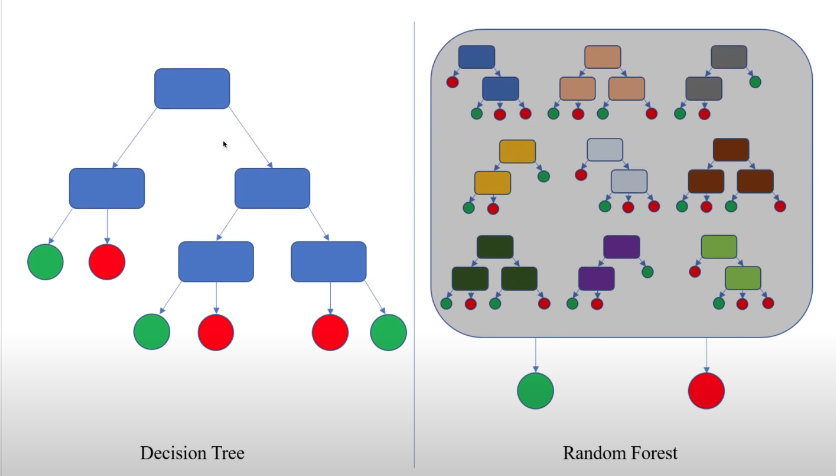

In case Of decision tree, we train a single decision tree. In random forest we train multiple decision trees on different training
sets obtained through boostrap aggregation.


## Random Forests : The algorithm

**Input**:

1. The training data $D$ with shape $(n,m)$, say $D_1,D_2,\ldots ,D_q$ with replacement from $D$.
2. In each of the datasets $D_j$, select $u$ out of $m$ where $u \le m$ features before each split and train a full decision tree $h_j(\mathbf x)$
3. The final predictor is
  * For regression, an average output from $q$ regressors is assigned to the new example:
  
  $$ h(\mathbf x) = \frac {1}{q} \sum_{j=1}^q h_j(\mathbf x) $$

  * For classification, a majority voting is taken and the class label with the maximum number of votes is assigned to the new example.



## Implementation

In order to keep the implementation focused to main components of random forest, we make use of `DecisionTreeClassifier` from scikit-learn library for decision tree components

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


We will build the code component-wise and finally combine them into a `RandomForest` class.



##Bagging

We define a function for bagging-creating 1 boostrap samples $D_1,D_2,\ldots,D_q$ from the original dataset $D:$
 * The key step is np.random.choice with `size=n_samples` and `replace=True` which ensures that the boostrap sample has the same number of samples as the original dataset and it is obtained by sampling with replacement.

In [ ]:
def bag(X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0]

   #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples, size = n_samples, replace = True , random_state = 1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True
  
  return X[indices], y[indices]

## Majority Voting
Code  `most_common_label` function for obtaining majority vote for  class labels.

In [ ]:
def most_common_label(y):
  #It is a collection where elements are stored as dictionary keys
  # and their counts are stored as dictionary values.

  counter = Counter(y)
  #most_common([n])
  #Return a list of the n most common elements and their counts from the most common to the least.
  #If n is omitted or None, most_common() returns all elements in the counter. 
  #Elements with equal counts are ordered in the order first encountered:

  
  most_common = counter.most_common(1)[0][0] 
  return most_common


y = [1,1,1,0,0,2,2,2,2,3,3,3]
print(Counter(y))
print(Counter(y).most_common(1))


Counter({2: 4, 1: 3, 3: 3, 0: 2})
[(2, 4)]


## Random forest class

we create `RandomForest` class with the following default parameters:

 * number of tree =10
 * minimum number of samples =2
 * maximum depth =100 

The `max_features` is a configurable parameter that can be set by the user.

In [ ]:
class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 



#Training random forest
we implement `fit` method.

 * Initialize an empty list of decision tree classifiers.
 * In the for loop, we train each decision tree with parameters set from random forest on a boostrapped sample obtained through the `bag` function.

In [ ]:
def fit(self,X,y):

  self.trees = []#Empty array of trees which gets filled in during operations.


  for _ in range(self.n_trees):
    tree = DecisionTreeClassifier(#we will now make RF class inherit features from Sklearn'
                                  max_depth = self.max_depth,
                                  min_samples_split = self.min_samples_split,
                                  max_features = self.max_features
                                  )
    
    X_sample,y_sample = bag(X,y)
    tree.fit(X_sample, y_sample)
    self.tress.append(tree)

##Inference




Let's implement `predict` function

Here, we need to note that each of the trees will give predictions for all the individual rows of the input data.

for example if we have random forest with 3 trees and 2 classes 0 & 1, let's assume the prediciton for 5 samples is as follows.

  * Tree 1 gives 11001
  * Tree 2 gives 00111
  * Tree 3 gives 10101

We need to aggregate the output for the respective samples and take an average/majority vote. For this, we will use `np.swapaxes`.

In [ ]:
def predict(self,X):
  #our RF class will create 10 tress and append them to a list using the training Data
  
  tree_predict = np.array([tree.predict(X) for tree in self.trees])
  tree_predict = np.swapaxes(tree_predict,0,1)
  y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
  return np.array(y_pred)


## Cleaned up code

Combine the different components of the class

In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common

class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 
    
  def fit(self,X,y):
    self.trees =[] #Empty array of trees which gets filled in during operations.
    for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
      tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                    min_samples_split = self.min_samples_split,
                                    max_depth = self.max_depth,
                                    max_features=self.max_features
                                  
          
      )
      X_sample, y_sample = bag(X,y) 
      tree.fit(X_sample,y_sample) 
      self.trees.append(tree) # we will append each of these tree.

  def predict(self,X):

    tree_predict = np.array([tree.predict(X) for tree in self.trees])
    tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
    return np.array(y_pred) 

  
  



## Implementation of Random Forest on real dataset

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true,y_pred):
  accuracy = np.where(y_true == y_pred,1,0).sum()/len(y_true)
  return accuracy

data = datasets.load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

clf = RandomForest(n_trees = 10, max_depth = 10, max_features  = 'sqrt')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy(y_test, y_pred))

0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



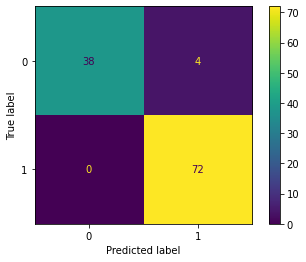

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred
                      ))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# Implementation of gradient boost

The principle behind boosting algorithms is that first we build a model on the training dataset, then a second model is built to
rectify the errors present in the first model. This procedure is continued until and unless the errors are minimized, and the
dataset is predicted correctly. In particular, we start with a weak model and subsequently, each new model is fit on a
version of the original data set.

**Notes:**
* A weak learner is a model that performs at least slightly better than a random model.
* Decision trees are generally used as weak learners in gradient
* Unlike where decision trees with only one level (decision stumps) are used, The decision trees used in
Gradient Boost generally contain some 3-7 levels.


##Steps
In this colab, we implement Gradient Boosting algorithm and show how it works for regression. Following are the steps
involved:


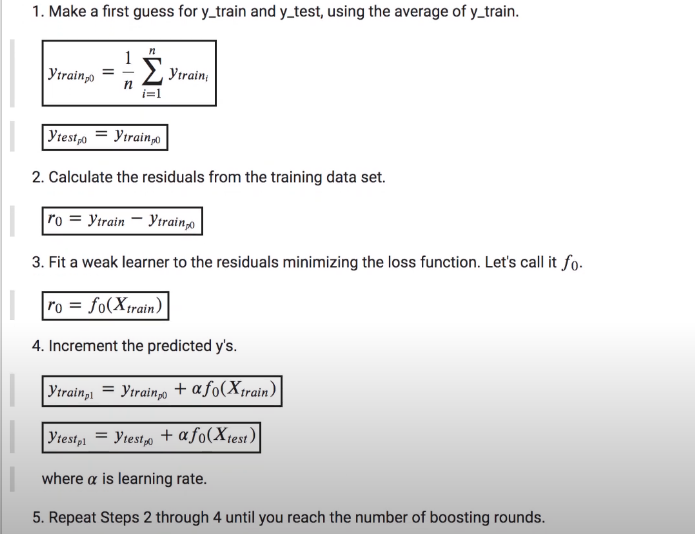

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We will need to run several iterations, so lets create a function to implement Gradient Boost

In [ ]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
  # make a first guess of our training target variable using the mean of y_train
  y_hat_train = np.repeat(np.mean(y_train), len(y_train))

  # initialize the test prediction with the mean of the training target variable
  y_hat_test = np.repeat(np.mean(y_train), len(X_test)) 

  #calculate the residuals from the training data using the first guess
  residuals = y_train - y_hat_train 

  #iterates through the boosting round.
  for i in range(0,boosting_rounds):
    #fit the model to the residuals
    model = model.fit(X_train, residuals) 

    #increment the predicted training y with the pseudo residual * learning rate
    y_hat_train = y_hat_train + learning_rate*model.predict(X_train) 

    #increment the predicted test y as well
    y_hat_test = y_hat_test + learning_rate * model.predict(X_test) 

    #calculate the residuals for the next round 

    residuals = y_train - y_hat_train 
  return y_hat_train, y_hat_test



We will create a synthetic data on which we will apply gradient boost

In [ ]:
from sklearn.datasets import make_regression 


X, y = make_regression(
                        n_samples=1000,
                        n_features = 20,
                        n_informative =15,
                        n_targets =1,
                        bias = 0.0,
                        noise=20,
                        shuffle=True,
                        random_state=13
                    )

x_train = X[0:800] 
y_train = y[0:800] 

x_test = X[800:] 
y_test = y[800:] 

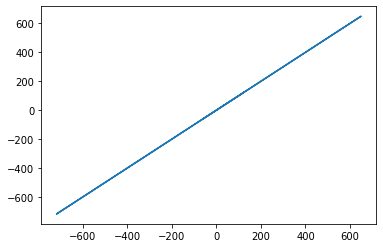

In [ ]:
plt.plot(y,y)

The weak learner that we will use in DecisionTreeRegressor with a depth of 3. We can also use other regressors such as linear regression, ridge regression etc.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3)


Let us see how the squared error reduces as we keep increasing the number of boosting rounds.
We will store the errors in a list, and will plot further.

In [ ]:
mse_train = []

n_rounds = np.arange(5,101,5)

for n_round in n_rounds:
  y_hat_train = GradBoost(model,
                          x_train,
                          y_train,
                          x_test,
                          boosting_rounds = n_round,
                          learning_rate = 0.1)[0]
                         
  mse = np.mean((y_train - y_hat_train)**2)
  print('#n_round',n_round,mse)
  mse_train.append(mse)

#n_round 5 34533.86849419914
#n_round 10 25528.592361427367
#n_round 15 19136.599769132084
#n_round 20 14648.04450759926
#n_round 25 11459.06364248089
#n_round 30 9128.094374117592
#n_round 35 7310.768003762691
#n_round 40 5978.90406036746
#n_round 45 4945.0105504213625
#n_round 50 4114.202235579171
#n_round 55 3504.6087240775973
#n_round 60 2986.892222453875
#n_round 65 2592.2055075265334
#n_round 70 2231.005500265884
#n_round 75 1942.7838152537688
#n_round 80 1721.5043747746472
#n_round 85 1538.2240733809203
#n_round 90 1386.3457437257232
#n_round 95 1240.7055168322302
#n_round 100 1117.841230852527


Text(0.5, 0, 'Boosting rounds')

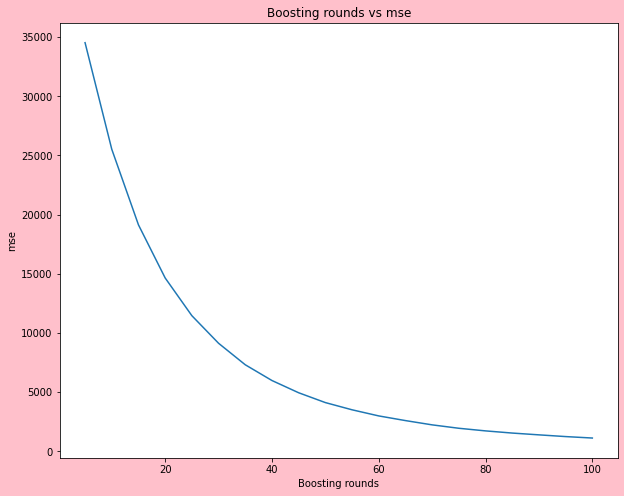

In [ ]:
plt.figure(figsize = (10,8),facecolor = 'pink')
plt.plot(n_rounds,mse_train)
plt.title('Boosting rounds vs mse')
plt.ylabel('mse')
plt.xlabel('Boosting rounds')

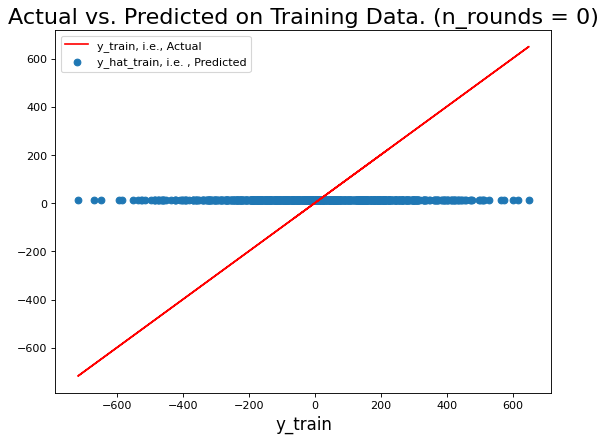

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=0
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

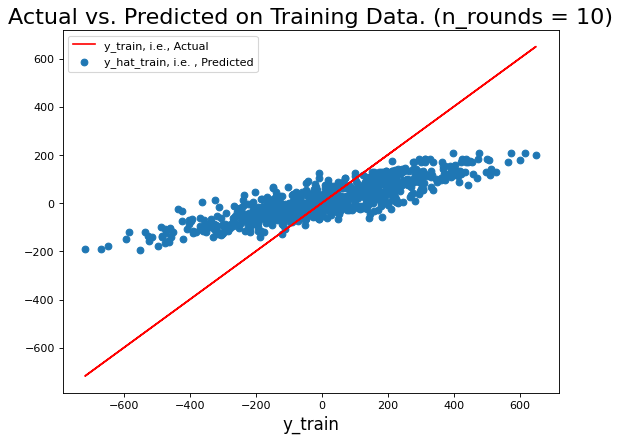

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=10
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

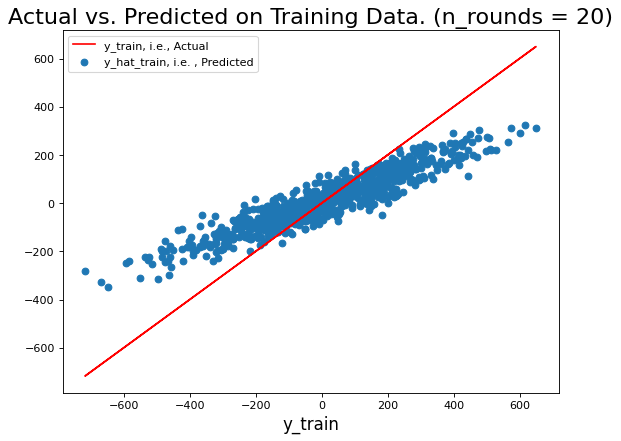

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds= 20
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

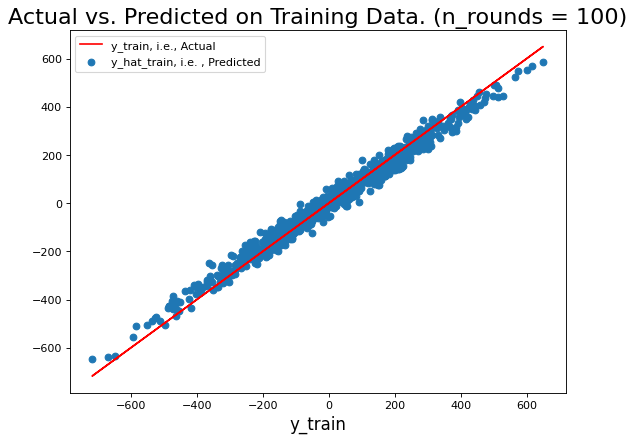

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=100

y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()